# Embedding geometry

Play with some embedding geometry.

# Preliminaries

In [1]:
# load some packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [2]:
# cosine similarity
def cosine_similarity(v1, v2):
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)) 

In [3]:
def plot_vectors_with_cosine_similarity(word1_label, word2_label, word1_vec, word2_vec):
    
  # colors
  colors = sns.color_palette("husl", 5)  # Fetching a palette with 5 colors
    
  # reference vectors
  reference_vectors = np.array([(1, 1), (-1, 1), (-1, -1), (1, -1)])

  # normalize
  word1_vec = word1_vec / np.linalg.norm(word1_vec) if np.linalg.norm(word1_vec) != 0 else word1_vec
  word2_vec = word2_vec / np.linalg.norm(word2_vec) if np.linalg.norm(word2_vec) != 0 else word2_vec
  reference_vectors = reference_vectors / np.linalg.norm(reference_vectors, axis=1)[:, np.newaxis]

  # vector subtraction
  word_diff_vec = word1_vec - word2_vec

  # combine vectors
  word_vectors = [word1_vec,word2_vec,word_diff_vec]

  # cosine similarity for each vector with the word_diff_vec
  reference_vectors_similarities = [cosine_similarity(word_diff_vec, vector) for vector in reference_vectors]
  word_vectors_similarities = [cosine_similarity(word_diff_vec, vector) for vector in word_vectors]
    
  # plot
  plt.figure(figsize=(8, 8))

  # plot limits
  plt.xlim([-1,1])
  plt.ylim([-1,1])
    
  # square plot
  ax = plt.gca()
  ax.set_aspect("equal")
    
  # plot the word vectors
  for word, vector, color, label, similarity in zip([word1_label, word2_label], [word1_vec, word2_vec], [colors[0], colors[0]], [word1_label, word2_label], [word_vectors_similarities[0],word_vectors_similarities[1]]):
    plt.quiver(0, 0, vector[0], vector[1], angles="xy", scale_units="xy", scale=1, color=color)
    plt.text(vector[0], vector[1], f"{label}\n({vector[0]:.2f}, {vector[1]:.2f})\nSim: {similarity:.2f}", color=color)
    
  plt.quiver(0, 0, word_diff_vec[0], word_diff_vec[1], angles="xy", scale_units="xy", scale=1, color=colors[1], width=0.005)
  plt.text(word_diff_vec[0], word_diff_vec[1], f"{word1_label}-{word2_label}\n({word_diff_vec[0]:.2f}, {word_diff_vec[1]:.2f})\nSim: {word_vectors_similarities[2]:.2f}", color=colors[1])
    
  # plot base vectors with cosine similarity
  for vector, similarity in zip(reference_vectors, reference_vectors_similarities):
    plt.quiver(0, 0, vector[0], vector[1], angles="xy", scale_units="xy", scale=1, color=colors[2])
    plt.text(vector[0], vector[1], f"({vector[0]:.2f}, {vector[1]:.2f})\nSim: {similarity:.2f}", color=colors[2])
    
  plt.grid(True)
  plt.axhline(0, color="black", linewidth=0.5)
  plt.axvline(0, color="black", linewidth=0.5)
  plt.show()

# Plot

In [4]:
# demo vectors
word1_vec_updated = np.array([1, 5])
word2_vec_updated = np.array([6, 4])

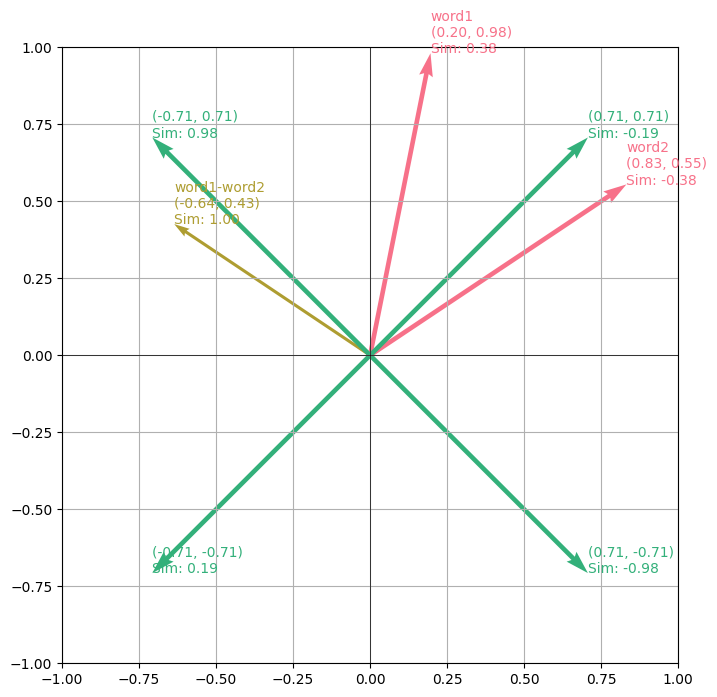

In [5]:
# plot
plot_vectors_with_cosine_similarity(word1_label="word1", 
                                    word2_label="word2", 
                                    word1_vec=word1_vec_updated, 
                                    word2_vec=word2_vec_updated)